<a href="https://colab.research.google.com/github/peterlhn/Google-Colab/blob/master/Tree_Classification_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Tree Performance**

**Importing Required Libraries**

[Decision Tree Classification in Python](https://www.datacamp.com/community/tutorials/decision-tree-classification-python)

In [ ]:
import pandas as pd
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 

**Loading Data**


In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("https://storage.googleapis.com/ppp-personal-project/Machine-Learning-Dataset-and-Code/Others/diabetes.csv", header=0, names=col_names)

In [ ]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Feature Selection**

Here, you need to divide given columns into two types of variables 
* Dependent(or target variable)  
* Independent variable(or feature variables) <- **CLASS**

In [ ]:
#Split dataset in features and target variable

# Features (independent variable)
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = pima[feature_cols]    

# Target (dependent variable)
y = pima.label            

In [ ]:
print("--------Features----------------")
print(X.head(3))

print("--------Target------------------")
print(y.head(3))

--------Features----------------
   pregnant  insulin   bmi  age  glucose  bp  pedigree
0         6        0  33.6   50      148  72     0.627
1         1        0  26.6   31       85  66     0.351
2         8        0  23.3   32      183  64     0.672
--------Target------------------
0    1
1    0
2    1
Name: label, dtype: int64


**Splitting Data**

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size.

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)  # 70% training and 30% test

**Building Decision Tree Model**

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.696969696969697


**Visualizing Decision Trees**

You can use **Scikit-learn's export_graphviz function** for display the tree within a Jupyter notebook.


In [ ]:
# !pip install graphviz
# !pip install pydotplus

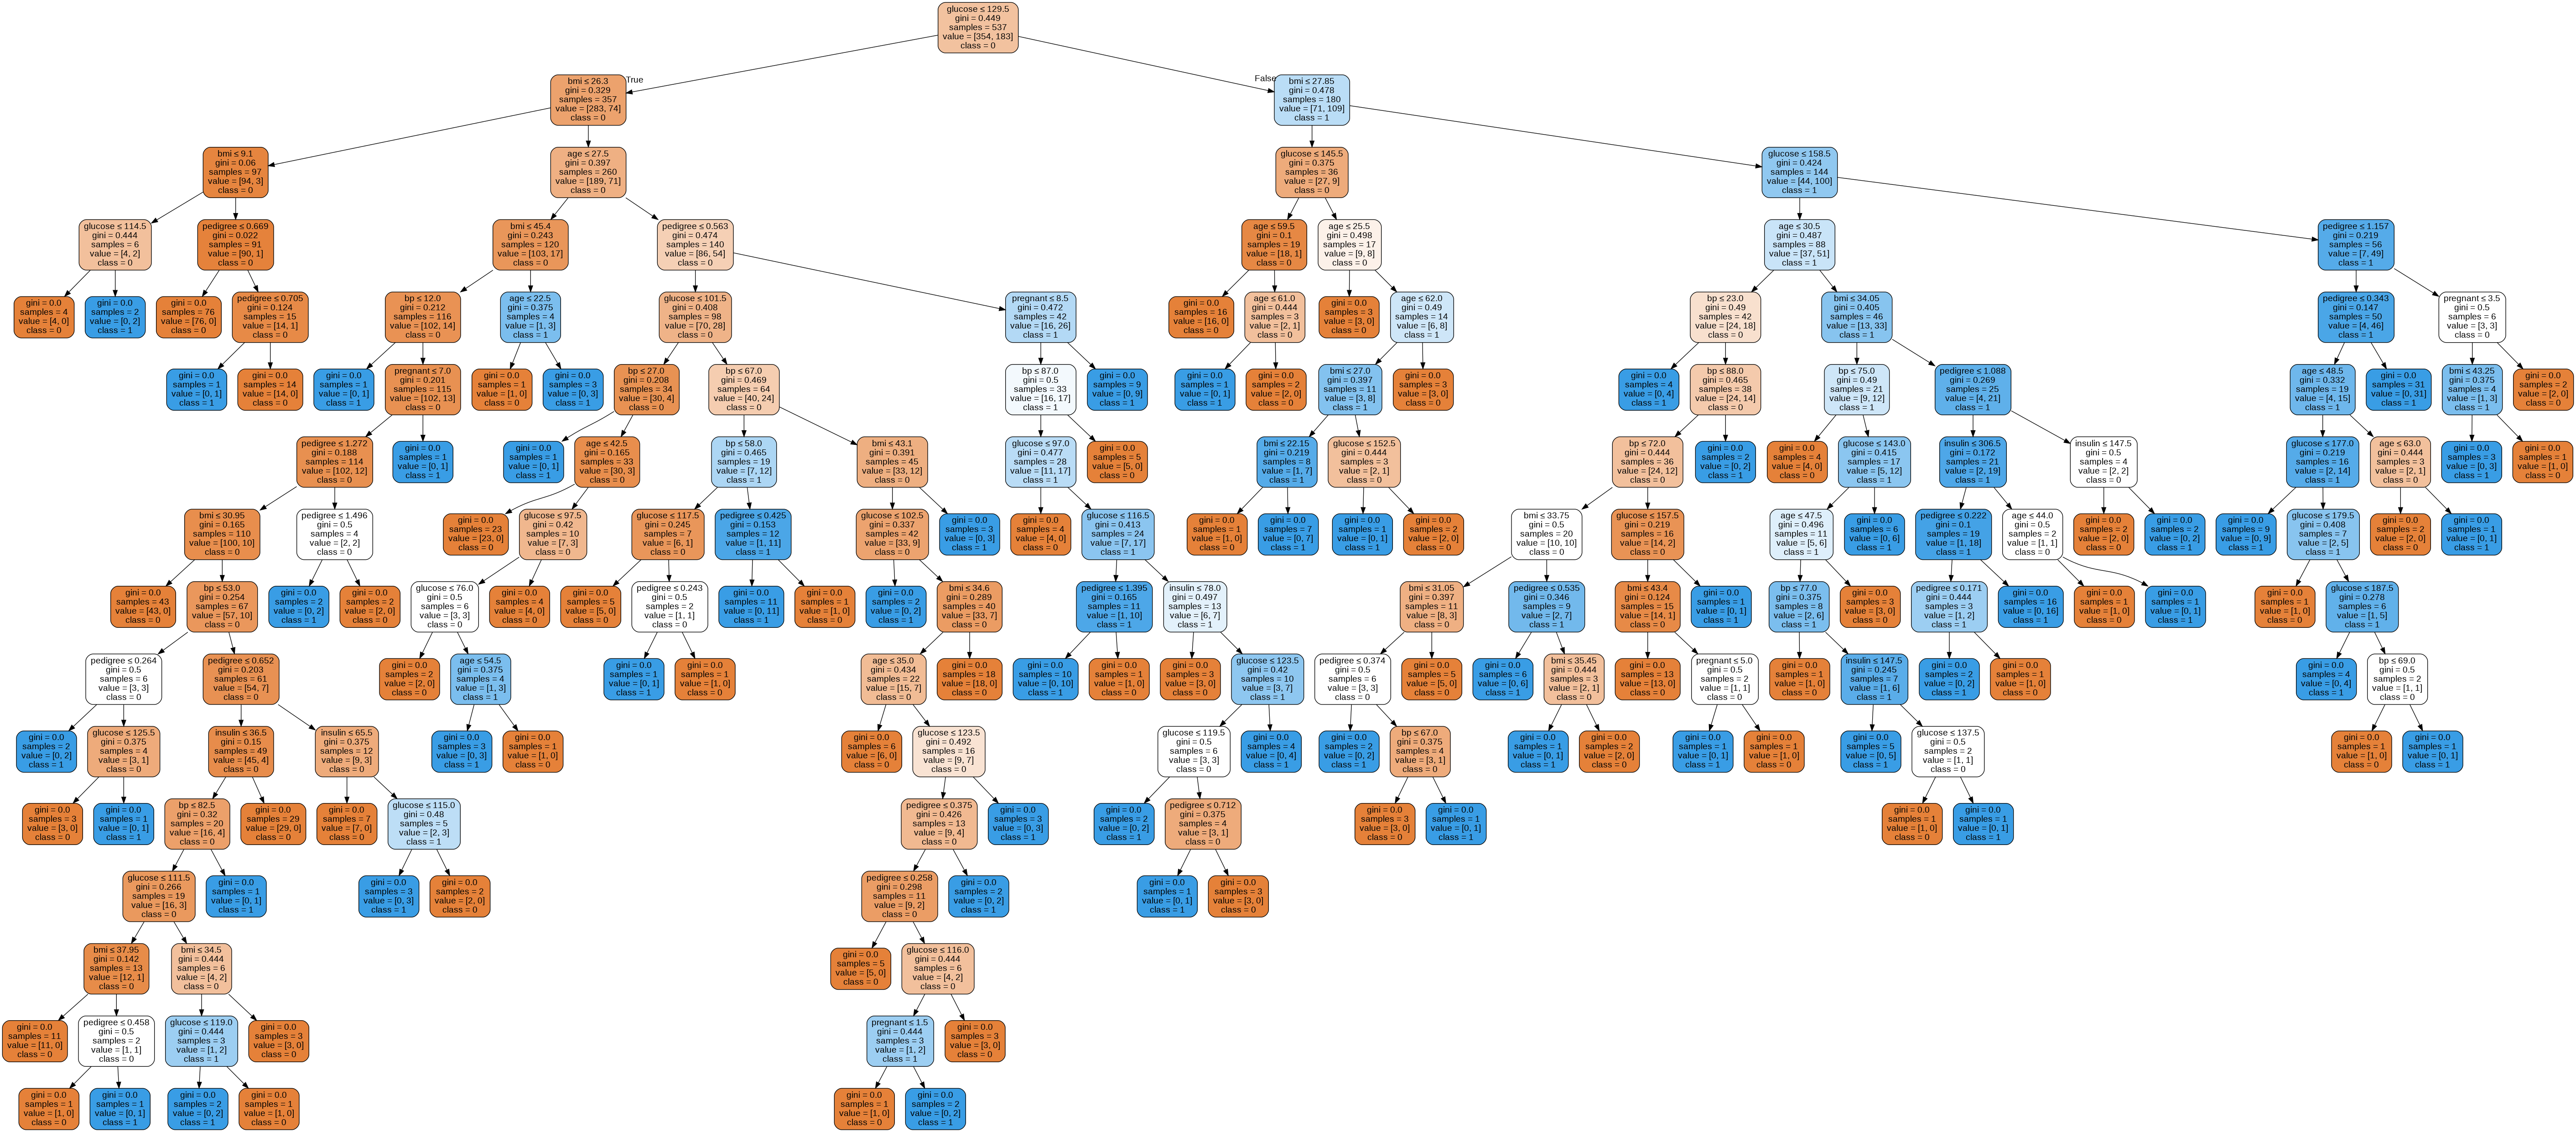

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

# Create a Tem environment to input data as string
dot_data = StringIO()

# Export a decision tree in DOT format.
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])

# Create graph object, tranform it from DOT to graph object
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

# Trun graph object to readable graphic format (PNG)
graph.write_png('diabetes.png')

# Show the graphic PNG
Image(graph.create_png())

## **Optimizing Decision Tree Performance**

* **criterion** : optional (default=”gini”): 
  
  This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.
    * “gini” for the Gini impurity 
    * “entropy” for the information gain.

* **splitter** : string, optional (default=”best”) or Split Strategy: 

  This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.
  * “best” to choose the best split 
  * “random” to choose the best random split. 

* **max_depth** : int or None, The maximum depth of the tree.




In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


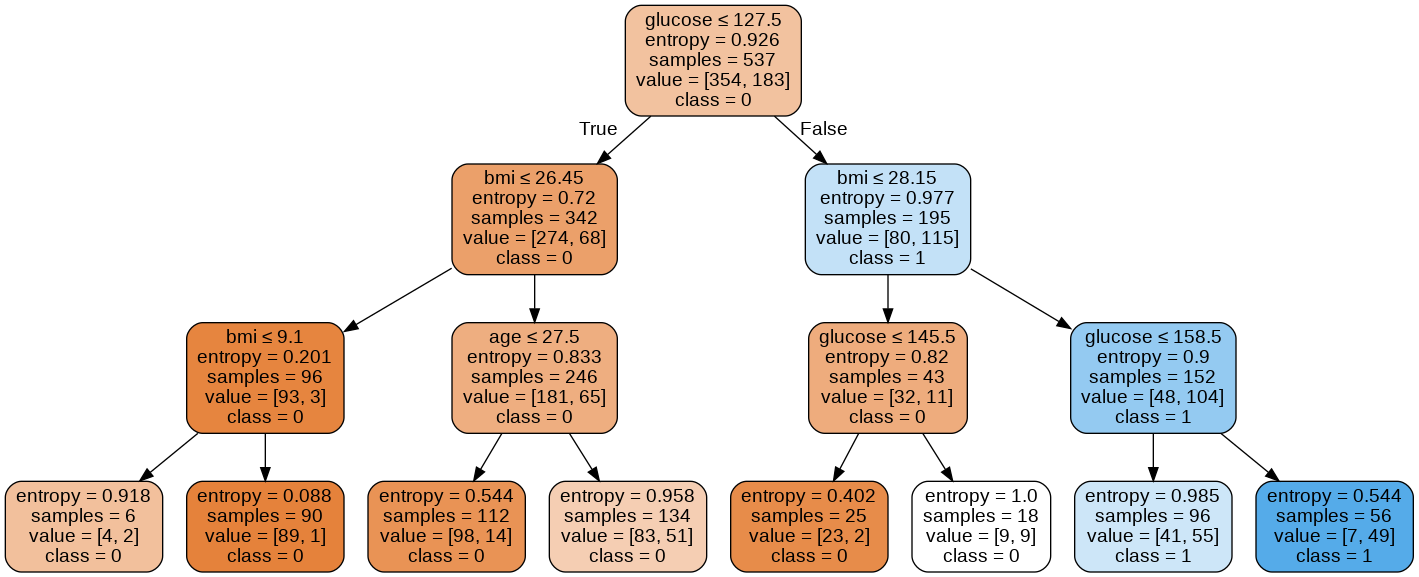

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Create a Tem environment to input data as string
dot_data = StringIO()

# Export a decision tree in DOT format.
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])

# Create graph object, tranform it from DOT to graph object
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

# Trun graph object to readable graphic format (PNG)
graph.write_png('diabetes.png')

# Show the graphic PNG
Image(graph.create_png())

##**See how criterion and max_depth affect the result**

In [ ]:
def get_depth_accuracy(criterion_method, splitter_method, depth_num):
    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier(criterion=criterion_method, splitter = splitter_method, max_depth=depth_num)
    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)
    #Predict the response for test dataset
    y_pred = clf.predict(X_test)

    accuracy_score = metrics.accuracy_score(y_test, y_pred)

    return criterion_method, splitter_method, depth_num, accuracy_score

In [ ]:
data = []
criterion_method_list = ['gini', 'entropy']
splitter_method_list = ['best', 'random']

for c in criterion_method_list:
  for s in splitter_method_list:
    for i in range(1,21):
      criterion_method, splitter_method, depth_num, accuracy_score = get_depth_accuracy(c,s, i)
      data.append([criterion_method, splitter_method, depth_num,accuracy_score])
      # print(f"Accuracy for {criterion_method} - {splitter_method} with depth={depth_num}: {accuracy_score}")


In [ ]:
df = pd.DataFrame(data, columns = ['criterion_method', 'splitter_method', 'depth_num', 'accuracy_score'])
print(df.sample(5))

   criterion_method splitter_method  depth_num  accuracy_score
59          entropy            best         20        0.761905
63          entropy          random          4        0.744589
48          entropy            best          9        0.722944
38             gini          random         19        0.701299
4              gini            best          5        0.770563


<Figure size 1296x432 with 0 Axes>

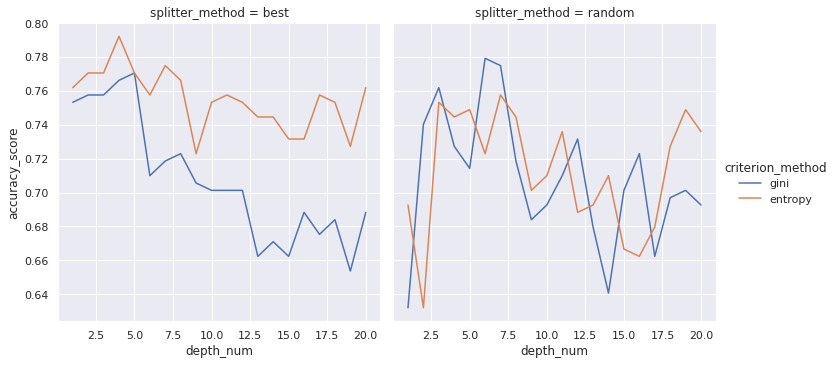

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set size of the plat
plt.figure(figsize=(18, 6))

# Plot the responses for different events and regions
sns.relplot(kind="line", 
            x="depth_num", y="accuracy_score",
            hue="criterion_method", col = "splitter_method",
             data=df)